In [ ]:
#Run this cell to install dependencies

import IPython
import sys
import os

def in_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False

if in_colab():

    with open(os.devnull, 'w') as fnull:
        # Install Qiskit with visualization and machine learning support
        ret1 = os.system('pip install qiskit[visualization,machine-learning]==0.43.3 > /dev/null 2>&1')
        # Install Qiskit Aer simulator
        ret2 = os.system('pip install qiskit-aer==0.12.2 > /dev/null 2>&1')
        # Install Qiskit Machine Learning
        ret3 = os.system('pip install qiskit-machine-learning==0.5.0 > /dev/null 2>&1')
        # Install Qiskit Experiments
        ret4 = os.system('pip install qiskit-experiments==0.4.0 > /dev/null 2>&1')
        # Install matplotlib and numpy
        ret5 = os.system('pip install matplotlib numpy > /dev/null 2>&1')

    print("All packages installed successfully with compatible versions.")
else:
    print("Packages not installed successfully.")



All packages installed successfully with compatible versions.


**Quantum Feature Encoding as a Preprocessing Step in ML Pipelines**

In modern machine learning pipelines, preprocessing classical data is vital for improving model performance. When incorporating quantum computing, quantum feature encoding becomes a fundamental preprocessing step, where classical data vectors are transformed into quantum states for subsequent quantum processing.

This encoding bridges classical data with quantum algorithms, allowing quantum circuits to operate on data features directly. Encoding methods such as angle encoding translate classical numeric features into qubit rotations, making them ready for quantum circuits to extract meaningful representations.

Incorporating quantum feature encoding into ML pipelines allows hybrid quantum-classical workflows, where encoded data can be processed by quantum algorithms (like QPCA or variational circuits) and then passed back to classical models.

In the next code block, we demonstrate this preprocessing step by encoding classical data into qubit states using angle encoding, simulating it on a quantum backend, and visualizing the result on Bloch spheres—thus illustrating how data enters the quantum part of an ML pipeline.

Sample 1 classical features: [0.0000, 1.5708]


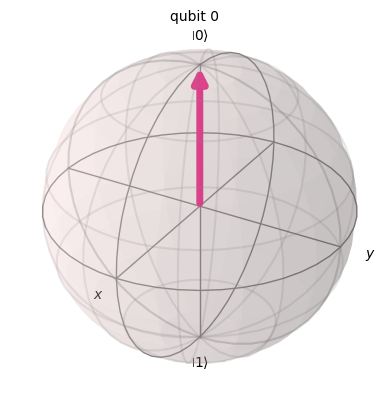

Sample 2 classical features: [0.7854, 0.7854]


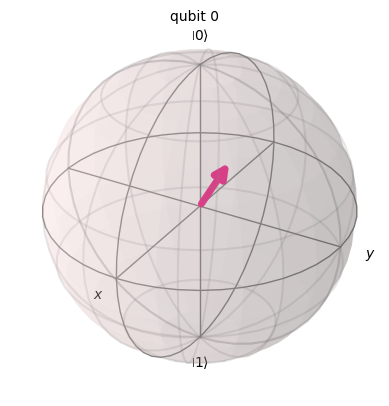

Sample 3 classical features: [1.5708, 0.0000]


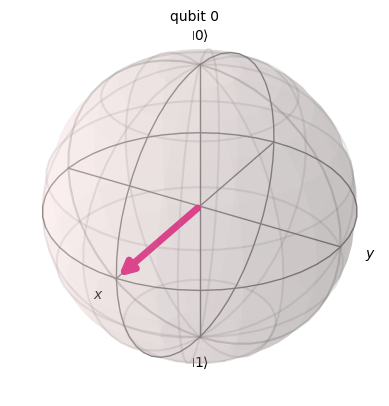

In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

samples = [
    [0, 0.5 * np.pi],
    [0.25 * np.pi, 0.25 * np.pi],
    [0.5 * np.pi, 0]
]

simulator = AerSimulator(method='statevector')

for i, sample in enumerate(samples, start=1):
    qc = QuantumCircuit(1)
    # First feature rotates about Y axis
    qc.ry(sample[0], 0)
    # Second feature rotates about Z axis (different axis for distinguishability)
    qc.rz(sample[1], 0)

    qc.save_statevector()
    result = simulator.run(qc).result()
    statevector = result.get_statevector(qc)

    print(f"Sample {i} classical features: [{sample[0]:.4f}, {sample[1]:.4f}]")

    fig = plot_bloch_multivector(statevector)
    display(fig)


**Quantum Feature Maps and Kernel Methods in ML Pipelines**

Quantum feature maps are powerful tools that map classical data into high-dimensional Hilbert spaces through quantum circuits. This mapping enables quantum-enhanced representations that classical methods struggle to efficiently replicate.

In machine learning pipelines, quantum feature maps enable the construction of quantum kernels — similarity measures between data points defined by inner products of quantum states. These kernels facilitate powerful algorithms like quantum support vector machines (QSVM), leveraging the complex geometry of quantum states.

This block explores the integration of quantum feature maps and kernel evaluations as preprocessing steps in ML pipelines. It highlights how quantum kernels can enhance classical learning algorithms by implicitly working in expanded feature spaces, offering potential advantages in classification and regression tasks.



In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
import numpy as np

# Sample classical dataset (toy data)
classical_data = np.array([
    [0.1, 0.7],
    [0.5, 0.5],
    [0.8, 0.2]
])

# Define a quantum feature map (ZZFeatureMap encodes data using entangling rotations)
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')

# Setup simulator backend for kernel evaluation
backend = Aer.get_backend('aer_simulator_statevector')

# Instantiate quantum kernel using the feature map and backend
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

print("Quantum Kernel Matrix Computed on Classical Dataset:")
# Evaluate the kernel matrix (similarities) between data samples
kernel_matrix = quantum_kernel.evaluate(classical_data)

print(kernel_matrix)


Quantum Kernel Matrix Computed on Classical Dataset:
[[1.         0.52976989 0.2258157 ]
 [0.52976989 1.         0.52811454]
 [0.2258157  0.52811454 1.        ]]


**Using Quantum Kernel in Classical ML: Support Vector Machines (SVM)**

In this block, we explore how the quantum kernel matrix, computed via quantum feature encoding, can be utilized in classical machine learning algorithms. Specifically, we focus on Support Vector Machines (SVM), a popular supervised learning method for classification tasks.

The kernel trick in SVM allows the algorithm to operate in a high-dimensional feature space without explicitly computing the coordinates in that space. By replacing the classical kernel with a quantum kernel derived from a quantum feature map, we potentially exploit quantum advantages in feature representation.

This integration demonstrates how quantum preprocessing can be directly plugged into classical ML workflows, enabling hybrid quantum-classical models. We will implement SVM using the quantum kernel matrix and evaluate its ability to classify simple toy data.



Classification Report for QSVC with Quantum Kernel:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.82      0.69      0.75        13
           2       0.60      0.69      0.64        13

    accuracy                           0.73        45
   macro avg       0.74      0.72      0.73        45
weighted avg       0.74      0.73      0.74        45



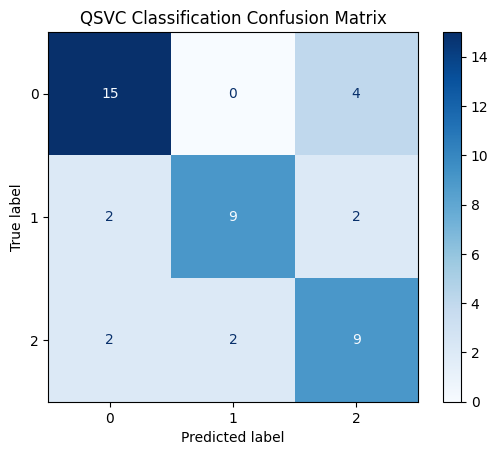

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit import BasicAer
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Setup quantum kernel with a feature map
quantum_kernel = QuantumKernel(quantum_instance=BasicAer.get_backend('qasm_simulator'))

# Initialize QSVC with quantum kernel
qsvc = SVC(kernel=quantum_kernel.evaluate)

# Train QSVC
qsvc.fit(X_train, y_train)

# Predict on test set
y_pred = qsvc.predict(X_test)

# Print classification report
print("Classification Report for QSVC with Quantum Kernel:")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("QSVC Classification Confusion Matrix")
plt.show()


**Quantum Feature Compression and Dimensionality Reduction Techniques in ML Pipelines**

In quantum machine learning workflows, efficient use of quantum resources is critical. Quantum feature encoding often maps classical data into high-dimensional quantum states, which can be expensive to store and process. Thus, dimensionality reduction and feature compression become important preprocessing steps to:

-) Reduce the number of qubits or quantum circuit complexity required

-) Mitigate noise by focusing on the most informative features

-) Improve classical post-processing and model interpretability

While classical methods like PCA can be applied after measurement, quantum-native compression techniques use parameterized quantum circuits (variational circuits) to learn compact representations of quantum states. These hybrid quantum-classical methods integrate seamlessly into ML pipelines and enable end-to-end optimization.

This block explores how to apply a Variational Quantum Autoencoder (VQAE) to compress quantum-encoded features, demonstrating its role as an ML preprocessing module before classical or quantum classifiers.

<ipython-input-14-e28f685eea6f>:32: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


Epoch 0: Loss = 0.5340
Epoch 10: Loss = 0.4662
Epoch 20: Loss = 0.4294
Epoch 30: Loss = 0.4141
Epoch 40: Loss = 0.4099
Epoch 50: Loss = 0.4079
Epoch 60: Loss = 0.4026
Epoch 70: Loss = 0.3895
Epoch 80: Loss = 0.3605
Epoch 90: Loss = 0.3072
Training finished.


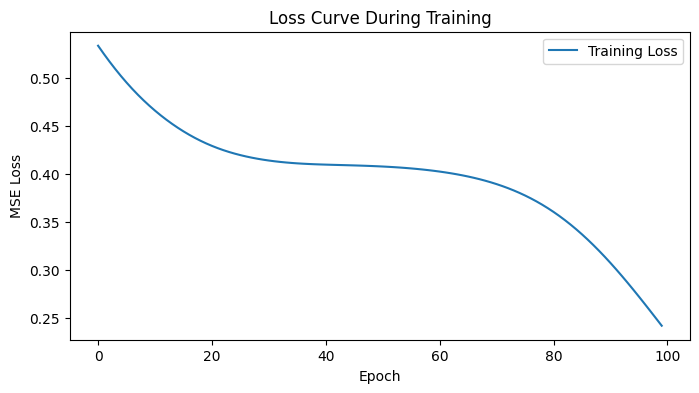

In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import ParameterVector
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
algorithm_globals.random_seed = 42

num_qubits = 2

# Define parameter vectors for feature map and ansatz circuits
feature_map_params = ParameterVector('x', num_qubits)
ansatz_params = ParameterVector('theta', num_qubits)

# Create feature map circuit with parameterized Ry rotations
feature_map = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    feature_map.ry(feature_map_params[i], i)

# Create ansatz circuit with parameterized Ry rotations
ansatz = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    ansatz.ry(ansatz_params[i], i)

# Setup Aer simulator backend and quantum instance
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend)

# Create TwoLayerQNN with the feature map and ansatz circuits
qnn = TwoLayerQNN(
    feature_map=feature_map,
    ansatz=ansatz,
    quantum_instance=quantum_instance
)

# Wrap QNN in TorchConnector for PyTorch compatibility
torch_qnn = TorchConnector(qnn)

# Define simple decoder: linear layer mapping QNN output scalar to num_qubits outputs
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, num_qubits)  # input dim=1, output dim=num_qubits

    def forward(self, x):
        return self.linear(x)

# Define variational quantum autoencoder combining QNN encoder and classical decoder
class VQAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch_qnn
        self.decoder = Decoder()

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Sample input data: three 2D feature vectors with pi-based angles
X = np.array([
    [np.pi / 2, 0],
    [0, np.pi / 2],
    [np.pi / 4, np.pi / 4],
], dtype=np.float32)

X_tensor = torch.tensor(X)

# Initialize model, loss function and optimizer
model = VQAutoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Track losses for visualization
losses = []

# Training loop
for epoch in range(100):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("Training finished.")

# Plot loss curve to visualize training progress
plt.figure(figsize=(8, 4))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Curve During Training')
plt.legend()
plt.show()



**Hybrid Quantum-Classical Autoencoders for Dimensionality Reduction in ML Pipelines**

In modern machine learning workflows, dimensionality reduction is a critical preprocessing step to extract meaningful features while reducing data complexity. Hybrid quantum-classical autoencoders leverage the strengths of quantum circuits for encoding complex data patterns combined with classical neural networks for decoding and reconstruction. This approach can enable efficient compression and feature extraction with potential quantum advantages. Integrating hybrid autoencoders within ML pipelines can improve performance on downstream tasks such as classification and clustering, especially on high-dimensional datasets. This module explores constructing and training such hybrid models, emphasizing their role in quantum-enhanced dimensionality reduction.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit import Aer

# Set seeds
np.random.seed(42)
torch.manual_seed(42)

num_qubits = 2
feature_dim = num_qubits
batch_size = 4
epochs = 50
learning_rate = 0.01

# Quantum backend
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend, shots=1024)

# Quantum circuits
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1)
ansatz = RealAmplitudes(num_qubits, reps=1)

# Quantum neural network (encoder)
qnn = TwoLayerQNN(
    feature_map=feature_map,
    ansatz=ansatz,
    quantum_instance=quantum_instance,
    input_gradients=True
)

# Get output dimension before wrapping with TorchConnector
qnn_output_dim = qnn.output_shape[0]

# Wrap with TorchConnector for PyTorch compatibility
torch_qnn = TorchConnector(qnn)

# Define hybrid autoencoder
class HybridAutoencoder(nn.Module):
    def __init__(self, qnn, output_dim, input_size):
        super().__init__()
        self.qnn = qnn
        self.decoder = nn.Sequential(
            nn.Linear(output_dim, 4),
            nn.ReLU(),
            nn.Linear(4, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        qnn_out = self.qnn(x)
        return self.decoder(qnn_out)

# Instantiate model with correct output dim
model = HybridAutoencoder(torch_qnn, output_dim=qnn_output_dim, input_size=feature_dim)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Toy dataset
X = np.array([
    [0.1, 0.7],
    [0.3, 0.3],
    [0.8, 0.2],
    [0.9, 0.9]
], dtype=np.float32)
X_tensor = torch.tensor(X)

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate reconstruction
model.eval()
with torch.no_grad():
    reconstructed = model(X_tensor).numpy()

print("\nOriginal Data:\n", X)
print("\nReconstructed Data:\n", reconstructed)


<ipython-input-19-acdde18cea6d>:23: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)


Epoch [1/50], Loss: 0.0910
Epoch [10/50], Loss: 0.0838
Epoch [20/50], Loss: 0.0730
Epoch [30/50], Loss: 0.0610
Epoch [40/50], Loss: 0.0515
Epoch [50/50], Loss: 0.0450

Original Data:
 [[0.1 0.7]
 [0.3 0.3]
 [0.8 0.2]
 [0.9 0.9]]

Reconstructed Data:
 [[0.26826844 0.4058466 ]
 [0.357916   0.44610304]
 [0.63815576 0.55882686]
 [0.83712745 0.6604834 ]]


**Quantum Data Reuploading Techniques in ML Pipelines for Enhanced Feature Encoding**

In quantum machine learning pipelines, the expressiveness of quantum circuits plays a pivotal role in effectively capturing complex data patterns. Quantum data reuploading is a powerful technique where classical data is encoded multiple times at different stages of a variational quantum circuit, increasing the circuit’s capacity to represent non-linear functions. This enhances feature encoding, enabling better separation of data classes and improved performance in downstream ML tasks. Incorporating quantum data reuploading within ML preprocessing pipelines allows for richer quantum feature maps without exponentially increasing qubit counts. This module explores the design and implementation of quantum circuits with data reuploading, assessing its benefits in quantum-enhanced feature encoding.



Sample 1 classical features: [0.7854, 1.5708]


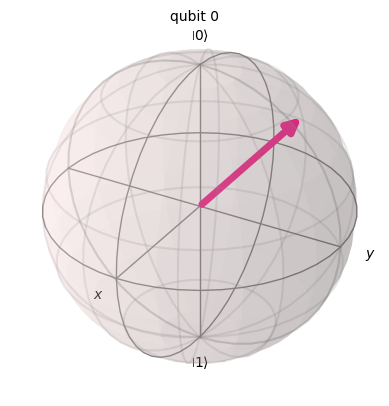

Sample 2 classical features: [1.5708, 0.7854]


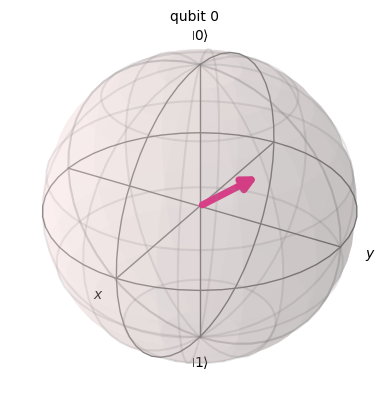

Sample 3 classical features: [1.0472, 1.0472]


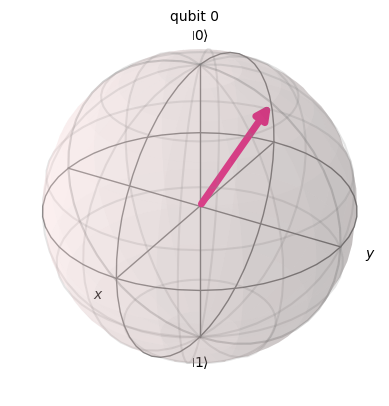

In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import ParameterVector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Quantum data reuploading circuit with multiple data encoding layers
def data_reuploading_circuit(data, weights):
    num_qubits = 1
    circuit = QuantumCircuit(num_qubits)
    params = ParameterVector('θ', length=len(weights))

    # Encode data and apply variational layers multiple times (data reuploading)
    for i in range(len(weights)//2):
        circuit.ry(data[0], 0)               # Encode classical data (first feature)
        circuit.rz(data[1], 0)               # Encode classical data (second feature)
        circuit.ry(params[2*i], 0)           # Trainable rotation (variational)
        circuit.rz(params[2*i + 1], 0)       # Trainable rotation (variational)

    return circuit, params

# Sample classical data points for encoding
classical_samples = [
    [np.pi/4, np.pi/2],
    [np.pi/2, np.pi/4],
    [np.pi/3, np.pi/3]
]

# Random initial weights for variational parameters
initial_weights = np.random.rand(6)

simulator = AerSimulator(method='statevector')

for i, sample in enumerate(classical_samples, start=1):
    qc, param_vector = data_reuploading_circuit(sample, initial_weights)
    bound_circuit = qc.bind_parameters({param_vector[j]: initial_weights[j] for j in range(len(initial_weights))})
    bound_circuit.save_statevector()

    result = simulator.run(bound_circuit).result()
    statevector = result.get_statevector(bound_circuit)

    print(f"Sample {i} classical features: [{sample[0]:.4f}, {sample[1]:.4f}]")
    fig = plot_bloch_multivector(statevector)
    display(fig)


**Optimizing Quantum Data Embedding for Enhanced Feature Extraction in ML Pipelines**

Quantum machine learning pipelines depend heavily on how classical data is embedded into quantum states. While fixed encoding schemes provide a baseline, variational quantum embeddings enable trainable, adaptive data encodings that optimize the representation of input features. These embeddings consist of parameterized quantum circuits where parameters are tuned during training to improve the distinguishability and relevance of encoded features for the ML task. By incorporating trainable quantum embeddings, ML workflows gain a dynamic preprocessing layer that can significantly enhance downstream classification or regression tasks. This module presents variational embedding circuits, parameter optimization techniques, and integration within hybrid quantum-classical ML pipelines.

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector, QuantumCircuit
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector

num_qubits = 2
feature_dim = 2

backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend, shots=1024)

# Create feature map with custom parameters named 'x'
feature_map_params = ParameterVector('x', length=feature_dim)
feature_map = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    feature_map.ry(feature_map_params[i], i)


# Create ansatz with its own custom parameters named 'phi'
ansatz_params = ParameterVector('phi', length=num_qubits * 2)  # example length
ansatz = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    ansatz.rx(ansatz_params[i], i)
    ansatz.rz(ansatz_params[i + num_qubits], i)


# Create the TwoLayerQNN using the custom feature_map and ansatz
qnn = TwoLayerQNN(
    feature_map=feature_map,
    ansatz=ansatz,
    quantum_instance=quantum_instance,
    input_gradients=True
)

model = TorchConnector(qnn)

# Sample input data (3 samples, 2 features each)
X = np.array([
    [0, 0],
    [np.pi / 4, np.pi / 4],
    [np.pi / 2, np.pi / 2]
])
X_tensor = torch.tensor(X, dtype=torch.float32)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.02)

epochs = 70
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = criterion(output, X_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

with torch.no_grad():
    final_features = model(X_tensor)

print("\nOptimized encoded features:")
print(final_features)


<ipython-input-21-6f92aac91a24>:15: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)


Epoch 10, Loss: 1.0113
Epoch 20, Loss: 0.9890
Epoch 30, Loss: 0.9873
Epoch 40, Loss: 0.9880
Epoch 50, Loss: 0.9873
Epoch 60, Loss: 0.9870
Epoch 70, Loss: 0.9870

Optimized encoded features:
tensor([[3.2424e-01],
        [1.6212e-01],
        [5.5511e-16]])


**Quantum Transfer Learning for Enhanced Generalization in Quantum ML Pipelines**

Quantum transfer learning adapts the powerful classical concept of transfer learning to quantum machine learning models. Instead of training a quantum model entirely from scratch, quantum transfer learning reuses pretrained quantum feature encodings or quantum neural networks on related tasks. This approach leverages previously learned representations, reducing training time and improving generalization across different datasets or problem domains. By fine-tuning quantum circuits or combining classical pretrained models with quantum layers, quantum transfer learning enables scalable and flexible ML pipelines. This final module explores strategies for implementing quantum transfer learning, the benefits of model reuse, and practical examples of boosting performance on new quantum-enhanced ML tasks.



In [ ]:
from qiskit import QuantumCircuit, Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Setup backend and quantum instance
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend, shots=1024)

# Define pretrained feature map (quantum encoding circuit)
pretrained_feature_map = QuantumCircuit(2)
x = ParameterVector('x', 2)
pretrained_feature_map.ry(x[0], 0)
pretrained_feature_map.ry(x[1], 1)

# Define fine-tune ansatz (variational circuit to be trained)
fine_tune_ansatz = QuantumCircuit(2)
theta = ParameterVector('θ', 4)
fine_tune_ansatz.rx(theta[0], 0)
fine_tune_ansatz.ry(theta[1], 0)
fine_tune_ansatz.rx(theta[2], 1)
fine_tune_ansatz.ry(theta[3], 1)

# Create TwoLayerQNN with separate feature_map and ansatz for transfer learning
qnn = TwoLayerQNN(
    feature_map=pretrained_feature_map,
    ansatz=fine_tune_ansatz,
    quantum_instance=quantum_instance
)

# Wrap QNN in TorchConnector for PyTorch integration
model = TorchConnector(qnn)

# Create dummy training data (4 samples, 2 features each)
X_train = np.array([
    [0.1, 0.2],
    [0.3, 0.4],
    [0.5, 0.6],
    [0.7, 0.8]
], dtype=np.float32)

# For a single output, binary classification labels must be 0 or 1
y_train = np.array([0, 1, 0, 1], dtype=np.int64)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train)

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor).squeeze()  # outputs shape: (batch_size,)
    y_train_tensor_float = y_train_tensor.float()  # BCEWithLogitsLoss expects float labels
    loss = criterion(outputs, y_train_tensor_float)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

print("Transfer learning training completed.")

# Predictions and output
with torch.no_grad():
    outputs = model(X_train_tensor).squeeze()
    pred_probs = torch.sigmoid(outputs)
    predictions = (pred_probs >= 0.5).long()
    print("Predictions:", predictions.numpy())


<ipython-input-22-7d140cefb31a>:13: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend, shots=1024)


Epoch [10/50], Loss: 0.7261
Epoch [20/50], Loss: 0.7074
Epoch [30/50], Loss: 0.6924
Epoch [40/50], Loss: 0.6820
Epoch [50/50], Loss: 0.6755
Transfer learning training completed.
Predictions: [1 1 1 1]


**Activity 1: Quantum Feature Encoding and Measurement-Based Feature Extraction**

-) You have a small classical dataset with 2 features per sample.

-) Normalize features to the range [0, π] to use as rotation angles.

-) Encode each sample into a single-qubit quantum circuit using Ry rotations on the qubit, sequentially applying rotations for each feature.

-) Instead of visualizing, perform quantum measurement in the computational basis (Z-basis) multiple times to extract measurement statistics.

-) Collect counts of outcomes ‘0’ and ‘1’ from the simulator.

-) Calculate the probability of measuring ‘0’ for each sample as a simple quantum feature.

-) This measurement probability acts as a quantum feature that can be fed into classical ML models.

-) Your task: Implement the encoding, measurement, and extraction of measurement probabilities for all samples in the dataset.

-) Hint: Use Qiskit Aer’s qasm simulator with sufficient shots to get reliable statistics.


**Activity 2: Design and Train a Quantum-Classical Hybrid Classifier with Quantum Kernel**

-) Use a small synthetic classical dataset with labels for classification.

-) Encode classical data into quantum states using a fixed feature map (e.g., ZZFeatureMap).

-) Compute the quantum kernel matrix from the encoded dataset.

-) Train a classical kernel SVM classifier using the quantum kernel matrix.

-) Evaluate classifier performance using accuracy and confusion matrix.

-) Compare with a classical kernel (e.g., RBF kernel) SVM for baseline.

**Activity 3: Advanced Quantum Embedding Optimization and Training**

**Instructions:**

-) Construct a variational quantum circuit to serve as a trainable quantum feature encoder.

-) Integrate this quantum encoder with a classical neural network to form a hybrid model.

-) Prepare a small synthetic dataset for training the model.

-) Train the hybrid model for multiple epochs, recording the loss at each step.

-) After training, analyze how the loss evolved to assess training effectiveness.



**Note: You should implement your own solution for all three activities based on the provided instructions before proceeding to the following solution blocks.**

In [ ]:
# Activity 1 Solution:

import numpy as np
from qiskit import QuantumCircuit, Aer, execute

# Classical dataset (5 samples, 2 features each)
raw_data = np.array([
    [0.1, 3.0],
    [1.0, 1.5],
    [2.0, 4.0],
    [1.5, 0.5],
    [3.0, 2.5]
])

# Normalize features to [0, π]
min_vals = raw_data.min(axis=0)
max_vals = raw_data.max(axis=0)
normalized_data = np.pi * (raw_data - min_vals) / (max_vals - min_vals)

# Setup Qiskit Aer qasm simulator for measurement
simulator = Aer.get_backend('qasm_simulator')
shots = 1024

quantum_features = []

# Encode and measure each sample
for idx, features in enumerate(normalized_data, start=1):
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit for measurement

    # Apply Ry rotations sequentially for each feature
    for angle in features:
        qc.ry(angle, 0)

    # Measure qubit in Z basis
    qc.measure(0, 0)

    # Execute circuit
    job = execute(qc, backend=simulator, shots=shots)
    result = job.result()
    counts = result.get_counts()

    # Calculate probability of outcome '0'
    prob_0 = counts.get('0', 0) / shots

    quantum_features.append(prob_0)

    print(f"Sample {idx}: Measurement counts = {counts}, P(0) = {prob_0:.4f}")

print("\nExtracted quantum features (P(0) probabilities):")
print(np.array(quantum_features))


Sample 1: Measurement counts = {'1': 832, '0': 192}, P(0) = 0.1875
Sample 2: Measurement counts = {'0': 363, '1': 661}, P(0) = 0.3545
Sample 3: Measurement counts = {'1': 268, '0': 756}, P(0) = 0.7383
Sample 4: Measurement counts = {'0': 550, '1': 474}, P(0) = 0.5371
Sample 5: Measurement counts = {'0': 626, '1': 398}, P(0) = 0.6113

Extracted quantum features (P(0) probabilities):
[0.1875     0.35449219 0.73828125 0.53710938 0.61132812]


<ipython-input-24-85222b2b0acc>:19: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


Quantum Kernel SVM Accuracy: 0.85


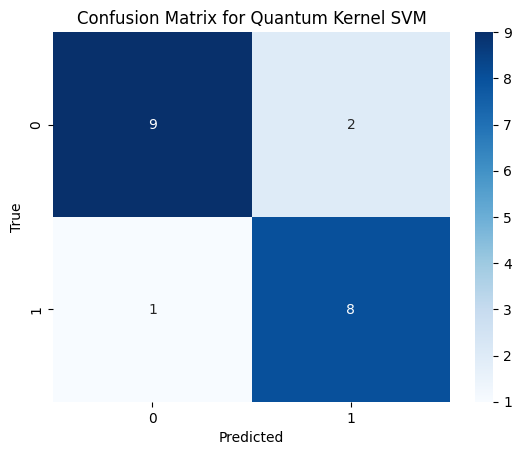

In [ ]:
# Activity 2 Solution

from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
X, y = make_classification(n_samples=20, n_features=2, n_redundant=0, n_informative=2, random_state=42)

# Define quantum feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=1)

# Setup quantum instance and kernel
backend = Aer.get_backend('aer_simulator_statevector')
quantum_instance = QuantumInstance(backend)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)

# Compute quantum kernel matrix
kernel_matrix = quantum_kernel.evaluate(x_vec=X)

# Train classical SVM with quantum kernel
qsvc = SVC(kernel='precomputed')
qsvc.fit(kernel_matrix, y)

# Predict on training data using kernel matrix
y_pred = qsvc.predict(kernel_matrix)

# Evaluate accuracy and plot confusion matrix
accuracy = accuracy_score(y, y_pred)
print(f"Quantum Kernel SVM Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Quantum Kernel SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Activity 3 Solution

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from qiskit import QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.providers.aer import AerSimulator
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit_machine_learning.connectors import TorchConnector

# Setup quantum backend and instance
backend = AerSimulator(method='statevector')
quantum_instance = QuantumInstance(backend)

# Define variational quantum circuit (trainable embedding)
num_qubits = 2
input_params = ParameterVector('x', length=num_qubits)  # Input parameters for encoding
weight_params = ParameterVector('θ', length=4)          # Trainable parameters

qc = QuantumCircuit(num_qubits)
# Encode classical input features via Ry rotations
for i in range(num_qubits):
    qc.ry(input_params[i], i)
qc.cx(0, 1)
# Variational ansatz layers with trainable parameters
qc.ry(weight_params[0], 0)
qc.ry(weight_params[1], 1)
qc.ry(weight_params[2], 0)
qc.ry(weight_params[3], 1)

# Setup CircuitQNN with correct input_params and weight_params
qnn = CircuitQNN(
    circuit=qc,
    input_params=input_params,
    weight_params=weight_params,
    quantum_instance=quantum_instance,
    output_shape=4  # Must match the output dimension of the QNN to match the classical decoder's input
)

# Wrap QNN for PyTorch
model = TorchConnector(qnn)

# Define a simple classical decoder network (linear layer)
class HybridModel(nn.Module):
    def __init__(self, qnn, classical_output_dim=1):
        super().__init__()
        self.qnn = qnn
        self.decoder = nn.Linear(4, classical_output_dim)  # Input dimension matches QNN output_shape

    def forward(self, x):
        qnn_out = self.qnn(x)
        out = self.decoder(qnn_out)
        return out

# Instantiate hybrid model
hybrid_model = HybridModel(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(hybrid_model.parameters(), lr=0.01)

# Generate toy dataset (3 samples, 2 features)
X = torch.tensor([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]], dtype=torch.float32)
y = torch.tensor([[0.2], [0.4], [0.6]], dtype=torch.float32)

# Training loop with loss tracking
epochs = 30
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = hybrid_model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

print("Training completed.")


<ipython-input-25-c349ad2a519a>:14: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(backend)


Epoch 5/30, Loss: 0.0326
Epoch 10/30, Loss: 0.0208
Epoch 15/30, Loss: 0.0233
Epoch 20/30, Loss: 0.0231
Epoch 25/30, Loss: 0.0200
Epoch 30/30, Loss: 0.0190
Training completed.
